In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from joblib import dump,load

In [3]:
data = pd.read_excel('/content/drive/My Drive/Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.shape

(10683, 11)

In [ ]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
# most frequent value is 1 stop
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
# imputing most frequent value
data['Total_Stops']=data['Total_Stops'].fillna('1 stop')

In [ ]:
# making non stop to 0 stop so further we can use it as integer after splitting it
data['Total_Stops']=data['Total_Stops'].replace('non-stop','0 stop')

In [ ]:
data['Total_Stop'] = data['Total_Stops'].str.split(' ').str[0]
data['Total_Stop'] = data['Total_Stop'].astype(int)

In [ ]:
data['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → NAG → DEL       1
BOM → DED → DEL → HYD             1
BOM → BLR → CCU → BBI → HYD       1
BLR → HBX → BOM → AMD → DEL       1
BOM → COK → MAA → HYD             1
Name: Route, Length: 128, dtype: int64

In [ ]:
# imputing most frequent value
data['Route'] = data['Route'].fillna('DEL → BOM → COK')

In [ ]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Month_of_Journey'] = data['Date_of_Journey'].dt.month
data['Day_of_Journey'] = data['Date_of_Journey'].dt.day

In [ ]:
def duration_minutes(a):
    a = a.split()
    a[0] = re.sub("\D", "", a[0])
    a[0] = int(a[0])*60
    if len(a)==1:
        a.append('0')
    a[1] = re.sub("\D",'', a[1])
    return a[0]+int(a[1])


In [ ]:
data['Duration'] = data['Duration'].apply(duration_minutes)       

In [ ]:
# dept and arrival hours and minutes
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data['Dep_Time_hours'] = data['Dep_Time'].dt.hour
data['Dep_Time_minutes'] = data['Dep_Time'].dt.minute
data['Arr_Time_hours'] = data['Arrival_Time'].dt.hour
data['Arr_Time_minutes'] = data['Arrival_Time'].dt.minute

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Total_Stop,Month_of_Journey,Day_of_Journey,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-08-19 22:20:00,2020-03-22 01:10:00,170,0 stop,No info,3897,0,3,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-08-19 05:50:00,2020-08-19 13:15:00,445,2 stops,No info,7662,2,1,5,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-08-19 09:25:00,2020-06-10 04:25:00,1140,2 stops,No info,13882,2,9,6,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-08-19 18:05:00,2020-08-19 23:30:00,325,1 stop,No info,6218,1,12,5,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-08-19 16:50:00,2020-08-19 21:35:00,285,1 stop,No info,13302,1,1,3,16,50,21,35


In [ ]:
data.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],inplace=True)

In [ ]:
data.drop('Total_Stops',inplace=True,axis=1)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Total_Stop,Month_of_Journey,Day_of_Journey,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,No info,3897,0,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,No info,7662,2,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,No info,13882,2,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,No info,6218,1,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,No info,13302,1,1,3,16,50,21,35


In [ ]:
data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
data.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Duration            0
Additional_Info     0
Price               0
Total_Stop          0
Month_of_Journey    0
Day_of_Journey      0
Dep_Time_hours      0
Dep_Time_minutes    0
Arr_Time_hours      0
Arr_Time_minutes    0
dtype: int64

In [ ]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration             int64
Additional_Info     object
Price                int64
Total_Stop           int64
Month_of_Journey     int64
Day_of_Journey       int64
Dep_Time_hours       int64
Dep_Time_minutes     int64
Arr_Time_hours       int64
Arr_Time_minutes     int64
dtype: object

In [6]:
import joblib

In [ ]:
joblib.dump(data,'final_data')

['final_data']

In [7]:
data = joblib.load('/content/final_data')

In [8]:
Y = data['Price']
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [9]:
data.drop('Price',axis=1,inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [12]:
data['Airline'] = lbl.fit_transform(data['Airline'])

data['Source'] = lbl.fit_transform(data['Source'])

data['Destination'] = lbl.fit_transform(data['Destination'])

data['Additional_Info'] = lbl.fit_transform(data['Additional_Info'])

data['Route'] = lbl.fit_transform(data['Route'])


In [13]:
data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Total_Stop,Month_of_Journey,Day_of_Journey,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes
0,3,0,5,18,170,8,0,3,24,22,20,1,10
1,1,3,0,84,445,8,2,1,5,5,50,13,15
2,4,2,1,118,1140,8,2,9,6,9,25,4,25
3,3,3,0,91,325,8,1,12,5,18,5,23,30
4,3,0,5,29,285,8,1,1,3,16,50,21,35


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data,Y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [17]:
std = StandardScaler()
X_train = std.fit_transform(X_train)

In [18]:
X_test = std.transform(X_test)

In [19]:
X_train

array([[ 0.01381155,  1.73659143,  1.05085563, ...,  0.29805099,
         0.38532046,  0.62626302],
       [ 0.01381155,  0.04339002, -0.29768588, ...,  0.29805099,
        -0.19727031,  0.62626302],
       [ 1.71213496,  0.04339002, -0.29768588, ...,  1.09887172,
         1.25920661, -1.19354106],
       ...,
       [ 0.86297325,  0.04339002, -0.29768588, ...,  1.36581196,
        -1.79939492,  0.32296234],
       [-0.41076931, -1.64981139,  2.39939715, ...,  0.83193148,
        -1.50809953,  0.01966166],
       [ 0.01381155,  0.04339002, -0.29768588, ..., -1.30359046,
        -1.36245184,  0.01966166]])

# Modeling

# Linear Regression

In [251]:
linmodel = LinearRegression()
linmodel.fit(X_train,y_train)
predict_linmodel_y = linmodel.predict(X_test)
print('Train_score',linmodel.score(X_train,y_train))
print('Test_score',linmodel.score(X_test,y_test))

Train_score 0.4304711607245078
Test_score 0.4282434606394514


In [252]:
print('r2 score =',r2_score(y_test,predict_linmodel_y))

r2 score = 0.4282434606394514


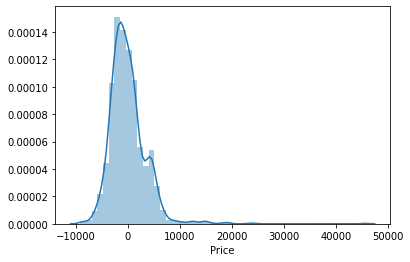

In [253]:
# error plot
sns.distplot((y_test-predict_linmodel_y))

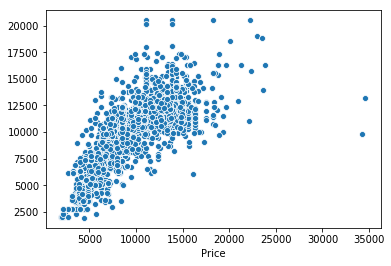

In [ ]:
sns.scatterplot(y_test,predict_linmodel_y)

# Ridge Regression

In [254]:
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
ridgemodel = Ridge()
ridge_regressor = GridSearchCV(ridgemodel,param_grid)
ridge_regressor.fit(X_train,y_train)
predict_ridgemodel_y = ridge_regressor.predict(X_test)
print('Train_score',ridge_regressor.score(X_train,y_train))
print('Test_score',ridge_regressor.score(X_test,y_test))
print('best_parameters',ridge_regressor.best_params_)

Train_score 0.4304699286805695
Test_score 0.4282336533596263
best_parameters {'alpha': 10}


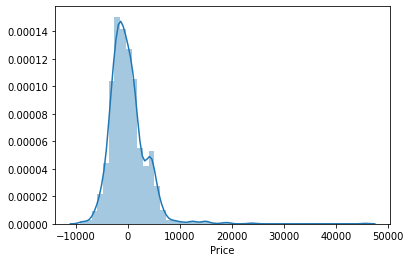

In [255]:
# error plot
sns.distplot((y_test-predict_ridgemodel_y))

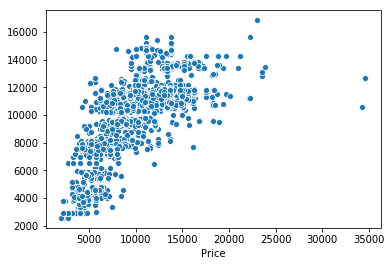

In [ ]:
# scatter plot
sns.scatterplot(y_test,predict_ridgemodel_y)

# Lasso Regression

In [22]:
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
lassomodel = Lasso()
lasso_regressor = GridSearchCV(lassomodel,param_grid)
lasso_regressor.fit(X_train,y_train)
print('Train_score',lasso_regressor.score(X_train,y_train))
print('Test_score',lasso_regressor.score(X_test,y_test))
print('best_parameters',lasso_regressor.best_params_)

Train_score 0.43039593603835874
Test_score 0.42782168390602243
best_parameters {'alpha': 10}


In [23]:
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
ENmodel = ElasticNet()
en_regressor = GridSearchCV(ENmodel,param_grid)
en_regressor.fit(X_train,y_train)
print('Train_score',en_regressor.score(X_train,y_train))
print('Test_score',en_regressor.score(X_test,y_test))
print('best_parameters',en_regressor.best_params_)

Train_score 0.430449221287284
Test_score 0.4281845014062882
best_parameters {'alpha': 0.01}


In [256]:
param_grid = {'n_neighbors':[5,10,15,25,20,25,30]}
knnmodel = KNeighborsRegressor()
knn_regressor = GridSearchCV(knnmodel,param_grid)
knn_regressor.fit(X_train,y_train)
predict_knnmodel_y = knn_regressor.predict(X_test)
print('Train_score',knn_regressor.score(X_train,y_train))
print('Test_score',knn_regressor.score(X_test,y_test))
print('best_parameters',knn_regressor.best_params_)

Train_score 0.819979467184822
Test_score 0.762110821662493
best_parameters {'n_neighbors': 5}


In [257]:
print('r2 score =',r2_score(y_test,predict_linmodel_y))

r2 score = 0.4282434606394514


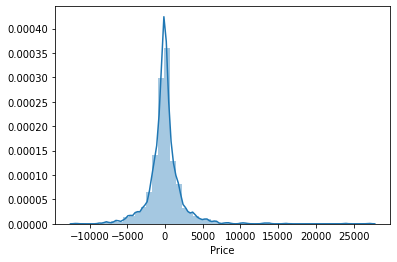

In [258]:
sns.distplot((y_test-predict_knnmodel_y))

In [29]:
poly = PolynomialFeatures(degree=3)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
linmodel = LinearRegression()
linmodel.fit(X_train_poly,y_train)
print('Train_score',linmodel.score(X_train_poly,y_train))
print('Test_score',linmodel.score(X_test_poly,y_test))

Train_score 0.7881804561698504
Test_score -1.0620186818955643e+19


# SVR

In [26]:
param_grid = {'kernel':['linear','rbf','poly'],
             'C':[0.001,0.01,0.1,1,10,100]}
svrmodel = SVR()
svr_regressor = GridSearchCV(svrmodel,param_grid,n_jobs=-1)
svr_regressor.fit(X_train,y_train)
print('Train_score',svr_regressor.score(X_train,y_train))
print('Test_score',svr_regressor.score(X_test,y_test))
print('best_parameters',svr_regressor.best_params_)

Train_score 0.510015446990801
Test_score 0.488252462829042
best_parameters {'C': 100, 'kernel': 'rbf'}


# RandomForest

In [259]:
rfmodel = RandomForestRegressor(n_estimators=100, max_depth=10,min_samples_split=5,random_state=45,max_features='sqrt')

rfmodel.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=45, verbose=0, warm_start=False)

In [260]:
y_test_pred = rfmodel.predict(X_test)
print('Test Score:',rfmodel.score(X_test,y_test))
print('Train Score:',rfmodel.score(X_train,y_train))
print('r2 score =',r2_score(y_test,y_test_pred))

Test Score: 0.8399106141969984
Train Score: 0.8893407053247337
r2 score = 0.8399106141969985


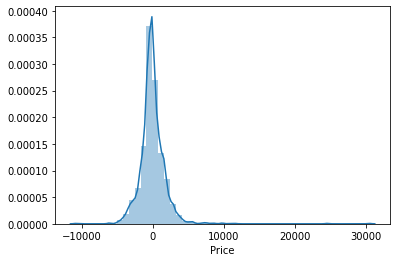

In [261]:
sns.distplot((y_test-y_test_pred))

# RandomForest Hyperparameter tuning

In [80]:
param_grid = {'max_depth':[5,10,15],
             'n_estimators':[100,300],
              'min_samples_split':[5,7,9,11],
              'max_features':['auto','sqrt','log2'],
              'max_samples':[0.5,0.7,0.9]
              }
rfgrid = RandomForestRegressor(random_state=42)
rf_regressor = GridSearchCV(rfgrid,param_grid,n_jobs=-1)
rf_regressor.fit(X_train,y_train)
predict_rf_y = rf_regressor.predict(X_test)

In [81]:
print('Test Score:',rf_regressor.score(X_test,y_test))
print('Train Score:',rf_regressor.score(X_train,y_train))
print('RandomForest best parameters:',rf_regressor.best_params_)

Test Score: 0.8767696815086499
Train Score: 0.9392019816790579
RandomForest best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'max_samples': 0.9, 'min_samples_split': 5, 'n_estimators': 300}


## Training Model with best Hyperparameters

In [262]:
rfmodel2 = RandomForestRegressor(n_estimators=300, max_depth=15,max_samples=0.9,min_samples_split=5,random_state=45,max_features='sqrt')
rfmodel2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=0.9, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=45, verbose=0, warm_start=False)

In [263]:
y_test_pred_ = rfmodel2.predict(X_test)
print('Test Score:',rfmodel2.score(X_test,y_test))
print('Train Score:',rfmodel2.score(X_train,y_train))
print('r2 score =',r2_score(y_test,y_test_pred))


Test Score: 0.8730997675251958
Train Score: 0.9386972310297583
r2 score = 0.8399106141969985


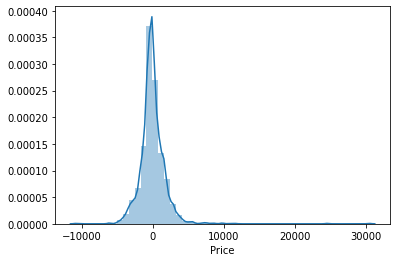

In [264]:
sns.distplot((y_test-y_test_pred))

# XGBoost with Default parameters

In [266]:
# xgboost with default parameter
xg_lb = xgb.XGBRegressor()
xg_lb.fit(X_train,y_train)
print('Test Score:',xg_lb.score(X_test,y_test))
print('Train Score:',xg_lb.score(X_train,y_train))
y_test_pred = xg_lb.predict(X_test)
print('r2 score =',r2_score(y_test,y_test_pred))


[08:55:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test Score: 0.830703985691844
Train Score: 0.8376723832254741
r2 score = 0.8307039856918439


# One hot encoding ( trying different featurization technique)




In [89]:
data_oh = joblib.load('final_data')
data_oh.drop('Price',inplace=True,axis=1)

In [91]:
data_oh.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Total_Stop,Month_of_Journey,Day_of_Journey,Dep_Time_hours,Dep_Time_minutes,Arr_Time_hours,Arr_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,No info,0,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,No info,2,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,No info,2,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,No info,1,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,No info,1,1,3,16,50,21,35


In [96]:
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(data_oh,Y, test_size=0.2, random_state=42)

In [115]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [116]:
X_cat_train = X_train_oh[['Airline','Source','Destination','Route','Additional_Info']]
X_cat_test = X_test_oh[['Airline','Source','Destination','Route','Additional_Info']]

In [122]:
X_numeric_train = X_train_oh[['Duration','Total_Stop','Month_of_Journey','Day_of_Journey','Dep_Time_hours','Dep_Time_minutes','Arr_Time_hours','Arr_Time_minutes']]
X_numeric_test = X_test_oh[['Duration','Total_Stop','Month_of_Journey','Day_of_Journey','Dep_Time_hours','Dep_Time_minutes','Arr_Time_hours','Arr_Time_minutes']]

In [123]:
# one hot encoded features of categorical data
train_cat_ohe = ohe.fit_transform(X_cat_train).toarray()
test_cat_ohe = ohe.transform(X_cat_test).toarray()

In [127]:
# standardize numeric dataframe
std = StandardScaler()
train_numeric_std = std.fit_transform(X_numeric_train)
test_numeric_std = std.transform(X_numeric_test)

In [132]:
# merge numerical features and one hot encoded feature
X_train_final = np.hstack((train_cat_ohe,train_numeric_std))
X_test_final = np.hstack((test_cat_ohe,test_numeric_std))

In [135]:
print('Shape of final Trian ',X_train_final.shape)
print('Shape of final Test ',X_test_final.shape)

Shape of final Trian  (8546, 166)
Shape of final Test  (2137, 166)


# Linear Regression

In [267]:
linmodel = LinearRegression()
linmodel.fit(X_train_final,y_train_oh)
predict_linmodel_y = linmodel.predict(X_test_final)
print('Train_score',linmodel.score(X_train_final,y_train_oh))
print('Test_score',linmodel.score(X_test_final,y_test_oh))
print('r2 score =',r2_score(y_test,predict_linmodel_y))

Train_score 0.7476269099146471
Test_score -7.236682454776557e+20
r2 score = -7.236682454776557e+20


# KNN

In [268]:
param_grid = {'n_neighbors':[5,10,15,25,20]}
knnmodel = KNeighborsRegressor()
knn_regressor = GridSearchCV(knnmodel,param_grid)
knn_regressor.fit(X_train_final,y_train_oh)
predict_knnmodel_y = knn_regressor.predict(X_test_final)
print('Train_score',knn_regressor.score(X_train_final,y_train_oh))
print('Test_score',knn_regressor.score(X_test_final,y_test_oh))
print('r2 score =',r2_score(y_test,predict_knnmodel_y))
print('best_parameters',knn_regressor.best_params_)

Train_score 0.8586655672050547
Test_score 0.8092325065315299
r2 score = 0.8092325065315299
best_parameters {'n_neighbors': 5}


# Ridge Regression

In [138]:
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
ridgemodel = Ridge()
ridge_regressor = GridSearchCV(ridgemodel,param_grid)
ridge_regressor.fit(X_train_final,y_train_oh)
predict_ridgemodel_y = ridge_regressor.predict(X_test_final)
print('Train_score',ridge_regressor.score(X_train_final,y_train_oh))
print('Test_score',ridge_regressor.score(X_test_final,y_test_oh))
print('best_parameters',ridge_regressor.best_params_)

Train_score 0.7476971658525586
Test_score 0.7441561771460521
best_parameters {'alpha': 0.1}


# Lasso Regression

In [139]:
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
lassomodel = Lasso()
lasso_regressor = GridSearchCV(lassomodel,param_grid)
lasso_regressor.fit(X_train_final,y_train_oh)
print('Train_score',lasso_regressor.score(X_train_final,y_train_oh))
print('Test_score',lasso_regressor.score(X_test_final,y_test_oh))
print('best_parameters',lasso_regressor.best_params_)

Train_score 0.7475663133408534
Test_score 0.7438722720247279
best_parameters {'alpha': 0.1}


# SVR

In [140]:
param_grid = {'kernel':['linear','rbf','poly'],
             'C':[0.001,0.01,0.1,1,10,100]}
svrmodel = SVR()
svr_regressor = GridSearchCV(svrmodel,param_grid,n_jobs=-1)
svr_regressor.fit(X_train_final,y_train_oh)
print('Train_score',svr_regressor.score(X_train_final,y_train_oh))
print('Test_score',svr_regressor.score(X_test_final,y_test_oh))
print('best_parameters',svr_regressor.best_params_)

Train_score 0.6384820726121387
Test_score 0.6385855150101949
best_parameters {'C': 100, 'kernel': 'linear'}


# Random Forest

In [179]:
rf = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=5,random_state=45)
rf.fit(X_train_final,y_train_oh)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=45, verbose=0, warm_start=False)

In [180]:

print('Train_score',rf.score(X_train_final,y_train_oh))
print('Test_score',rf.score(X_test_final,y_test_oh))

Train_score 0.924646808183851
Test_score 0.8612876325566431


# XGBoost

In [173]:
import xgboost as xgb

In [176]:
# XGBoost with default parameter
xg = xgb.XGBRegressor()
xg.fit(X_train_final,y_train_oh)

[07:45:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [178]:
print('Train_score',xg.score(X_train_final,y_train_oh))
print('Test_score',xg.score(X_test_final,y_test_oh))

Train_score 0.834823770144894
Test_score 0.8218565468663885


In [208]:
XG = xgb.XGBRegressor(n_estimators=500,subsample=0.6,colsample_bytree=0.6,n_jobs=-1,random_state=42)
XG.fit(X_train_final,y_train_oh)

[08:00:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

In [209]:
print('Train_score',XG.score(X_train_final,y_train_oh))
print('Test_score',XG.score(X_test_final,y_test_oh))

Train_score 0.8984250058224607
Test_score 0.8781248626144408


# Taking Top 50 IMP features using XGBoost

In [223]:
sorted_imp_index = np.argsort(XG.feature_importances_)[::-1]

In [224]:
len(sorted_imp_index)

166

In [222]:
XG.feature_importances_[sorted_imp_index]

array([1.3517590e-01, 1.1608844e-01, 7.9022385e-02, 6.9039129e-02,
       6.0016800e-02, 4.6297733e-02, 3.3512678e-02, 3.3068463e-02,
       3.2997333e-02, 3.0304406e-02, 3.0055474e-02, 2.9923856e-02,
       2.5732962e-02, 1.7567055e-02, 1.5929198e-02, 1.4523847e-02,
       9.4493600e-03, 8.3187828e-03, 8.0208229e-03, 8.0137318e-03,
       7.4300123e-03, 6.7470735e-03, 6.6760113e-03, 6.2746019e-03,
       6.1828387e-03, 6.1733210e-03, 6.0083098e-03, 4.9634930e-03,
       4.6219006e-03, 3.9973222e-03, 3.9181486e-03, 3.7345490e-03,
       3.6716899e-03, 3.4242561e-03, 3.3962301e-03, 3.3042750e-03,
       3.2728622e-03, 3.2254951e-03, 3.1317060e-03, 2.9081078e-03,
       2.8524352e-03, 2.8350449e-03, 2.7895339e-03, 2.6459971e-03,
       2.6099528e-03, 2.5764981e-03, 2.5581452e-03, 2.5577454e-03,
       2.5364626e-03, 2.3810680e-03, 2.3740486e-03, 2.3700334e-03,
       2.3329486e-03, 2.3082835e-03, 2.2103647e-03, 2.2053232e-03,
       2.1070559e-03, 1.9888298e-03, 1.8122967e-03, 1.8027839e

In [246]:
top_50_index = sorted_imp_index[:50]
feature_importance = XG.feature_importances_[top_50_index]
print('Top 50 Important features',feature_importance)

Top 50 Important features [0.1351759  0.11608844 0.07902239 0.06903913 0.0600168  0.04629773
 0.03351268 0.03306846 0.03299733 0.03030441 0.03005547 0.02992386
 0.02573296 0.01756706 0.0159292  0.01452385 0.00944936 0.00831878
 0.00802082 0.00801373 0.00743001 0.00674707 0.00667601 0.0062746
 0.00618284 0.00617332 0.00600831 0.00496349 0.0046219  0.00399732
 0.00391815 0.00373455 0.00367169 0.00342426 0.00339623 0.00330427
 0.00327286 0.0032255  0.00313171 0.00290811 0.00285244 0.00283504
 0.00278953 0.002646   0.00260995 0.0025765  0.00255815 0.00255775
 0.00253646 0.00238107]


In [247]:
X_train_top = X_train_final[:,top_50_index]
X_test_top = X_test_final[:,top_50_index]

# Linear Regression (top 50)

In [240]:
linmodel = LinearRegression()
linmodel.fit(X_train_top,y_train_oh)
predict_linmodel_y = linmodel.predict(X_test_top)
print('Train_score',linmodel.score(X_train_top,y_train_oh))
print('Test_score',linmodel.score(X_test_top,y_test_oh))

Train_score 0.7151676219611831
Test_score 0.7108337804620903


# Ridge Regression(top 50)

In [242]:
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
ridgemodel = Ridge()
ridge_regressor = GridSearchCV(ridgemodel,param_grid)
ridge_regressor.fit(X_train_top,y_train_oh)
predict_ridgemodel_y = ridge_regressor.predict(X_test_top)
print('Train_score',ridge_regressor.score(X_train_top,y_train_oh))
print('Test_score',ridge_regressor.score(X_test_top,y_test_oh))
print('best_parameters',ridge_regressor.best_params_)

Train_score 0.7242657124124632
Test_score 0.7194877313579942
best_parameters {'alpha': 0.1}


# Lasso Regression(top 50)

In [248]:
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100]}
lassomodel = Lasso()
lasso_regressor = GridSearchCV(lassomodel,param_grid)
lasso_regressor.fit(X_train_top,y_train_oh)
print('Train_score',lasso_regressor.score(X_train_top,y_train_oh))
print('Test_score',lasso_regressor.score(X_test_top,y_test_oh))
print('best_parameters',lasso_regressor.best_params_)

Train_score 0.7242861218776412
Test_score 0.7188838461961089
best_parameters {'alpha': 0.001}


# KNN with Top 50 features

In [244]:
param_grid = {'n_neighbors':[5,10,15,25,20]}
knnmodel = KNeighborsRegressor()
knn_regressor = GridSearchCV(knnmodel,param_grid)
knn_regressor.fit(X_train_top,y_train_oh)
predict_knnmodel_y = knn_regressor.predict(X_test_top)
print('Train_score',knn_regressor.score(X_train_top,y_train_oh))
print('Test_score',knn_regressor.score(X_test_top,y_test_oh))
print('best_parameters',knn_regressor.best_params_)

Train_score 0.8727392717065936
Test_score 0.8223005374914335
best_parameters {'n_neighbors': 5}


# SVR

In [249]:
param_grid = {'kernel':['linear','rbf','poly'],
             'C':[0.001,0.01,0.1,1,10,100]}
svrmodel = SVR()
svr_regressor = GridSearchCV(svrmodel,param_grid,n_jobs=-1)
svr_regressor.fit(X_train_top,y_train_oh)
print('Train_score',svr_regressor.score(X_train_top,y_train_oh))
print('Test_score',svr_regressor.score(X_test_top,y_test_oh))
print('best_parameters',svr_regressor.best_params_)

Train_score 0.6269481484300546
Test_score 0.6280607594286207
best_parameters {'C': 100, 'kernel': 'linear'}
